# SEA4001W - Introduction to Ocean modelling - Exercise 6 - 19/05/2025
## Ethan Smith SMTETH005 

### Euler-forward method from the lecture notes: 

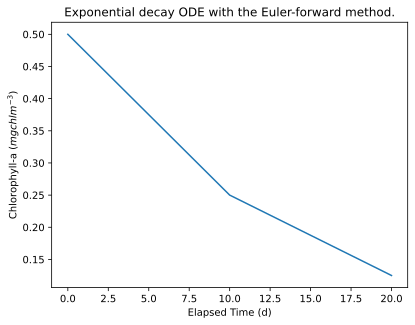

In [1]:
# This is a numerical solution of the decay equation

import pylab as pl
import matplotlib.pyplot as plt
import numpy as np

t0 = 0 # initial time in days
tn = 20 # end time in days 
dt = 10 # time interval in days 
k = 0.05 # decay rate in d^-1 
C0 = 0.5 # mg chl-a m^-3 (prey)

def f(k,C): # define the function for the RHS of the ODE (the dynamics) dC/dt = -kC
    
    return -k*C

# compute the total number of steps
Ntot = (pl.floor((tn-t0)/dt)+1).astype(int) # calculates how many intervals of dt fit into the time span from t0 to tn and adds 1 (for the initial condition)

# initialization 
C = pl.zeros(Ntot) # creates an empty array in which to store the model output, based on the required amount of time intervals 
t = C.copy() # this array is a copy of the one above and will store time 
C[0] = C0 # setting the initial concentration 
t[0] = t0 # setting the initial time 

# start the loop to populate the empty arrays with the model output
for n in range (Ntot-1):
    C[n+1] = C[n] + f(k,C[n])*dt # from the Euler-forward scheme
    t[n+1] = t[n] + dt

# plot this method

plt.plot(t, C)
plt.xlabel('Elapsed Time (d)')
plt.ylabel('Chlorophyll-a $(mg chl m^{-3})$')
plt.title('Exponential decay ODE with the Euler-forward method.')
%config InlineBackend.figure_format = 'svg'

### Modify the Euler-forward method to change it into the Euler-backward method:

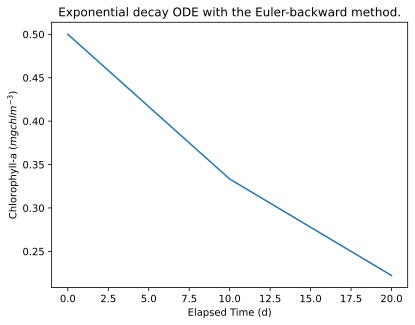

In [2]:
# start the loop to populate the empty arrays with the model output
for n in range (Ntot-1):
    C[n+1] = C[n] / (1 + k*dt) # from the Euler-backward scheme
    t[n+1] = t[n] + dt

# plot this method

plt.plot(t, C)
plt.xlabel('Elapsed Time (d)')
plt.ylabel('Chlorophyll-a $(mg chl m^{-3})$')
plt.title('Exponential decay ODE with the Euler-backward method.')
%config InlineBackend.figure_format = 'svg'

### Plot the effect of decreasing timesteps on a single graph: 
I used *perplexity pro* to help me streamline the process. I have added my conversation and output below.

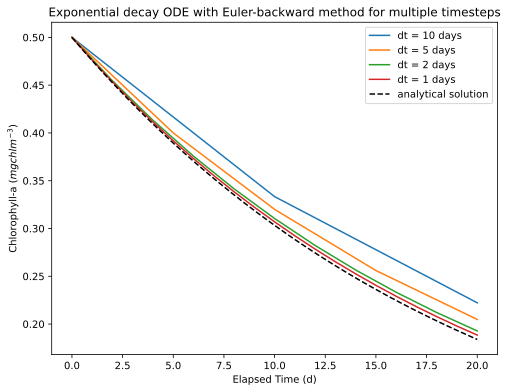

In [3]:
def euler_backward(dt):
    Ntot = int(pl.floor((tn-t0)/dt)+1) # calculate timesteps 
    C = pl.zeros(Ntot) # fill it with zeroes 
    t = C.copy() # copy it for time 
    C[0] = C0 # set the initial concentration
    t[0] = t0 # set teh initial time 
    for n in range(Ntot-1):
        C[n+1] = C[n] / (1 + k*dt)
        t[n+1] = t[n] + dt
    return t, C # return time and concentration arrays 

dt_values = [10, 5, 2, 1] # time steps to be plotted
plt.figure(figsize=(8,6)) # figure for plotting
for dt in dt_values: 
    t, C = euler_backward(dt)
    plt.plot(t, C, label=f'dt = {dt} days')

plt.xlabel('Elapsed Time (d)')
plt.ylabel('Chlorophyll-a $(mg chl m^{-3})$')
plt.title('Exponential decay ODE with Euler-backward method for multiple timesteps')

# add the curve from the analytical solution (exponential decay)

t_exact = np.linspace(t0, tn, 1000)  # create a time array from t0 to tn with 1000 steps 
C_exact = C0 * np.exp(-k * t_exact)  # analytical solution formula: C(t) = C0e^-kt

# add the linve
plt.plot(t_exact, C_exact, 'k--', label='analytical solution')
plt.legend()
%config InlineBackend.figure_format = 'svg'

### Comparing the curves at different timesteps: 

The approximation becomes more accurate as the timesteps are decreased. This can be seen as the shorter time interval's curves are closer to the analytical solution. 

<img src="https://r2cdn.perplexity.ai/pplx-full-logo-primary-dark%402x.png" class="logo" width="120"/>

# I gave perplexity the code for the Euler-backward method and asked it to show me how to plot mulitple timesteps on one plot. 

# This is the output below:
    
## compute the total number of steps

Ntot = (pl.floor((tn-t0)/dt)+1).astype(int) \# calculates how many intervals of dt fit into the time span from t0 to tn and adds 1 (for the initial condition)

## initialization

C = pl.zeros(Ntot) \# creates an empty array in which to store the model output, based on the required amount of time intervals
t = C.copy() \# this array is a copy of the one above and will store time
C[0] = C0 \# setting the initial concentration
t[0] = t0 \# setting the initial time

## start the loop to populate the empty arrays with the model output

for n in range (Ntot-1):
C[n+1] = C[n] / (1 + k*dt) \# from the Euler-backward scheme
t[n+1] = t[n] + dt

## plot this method

plt.plot(t, C)
plt.xlabel('Elapsed Time (d)')
plt.ylabel('Chlorophyll-a $(mg chl m^{-3})$')
plt.title('Exponential decay ODE with the Euler-backward method.') And I want to plot multiple timesteps on one single plot

To plot the Euler-backward method for multiple timesteps on the same graph, you can define a function that runs the Euler-backward scheme for any given $\Delta t$, then loop through a list of timestep values and plot each result on a single figure. This allows you to visually compare how the solution changes as the timestep decreases.

Here is the approach, as implemented in the working code:

- Define a function `euler_backward(dt)` that computes the solution for a given timestep.
- Use a list of timestep values, e.g., ``.
- For each timestep, run the solver and plot the result with a label.
- Add axis labels, a title, and a legend for clarity.

This method produces a plot similar to the one you provided, where each line corresponds to a different timestep, making it easy to see how the numerical solution approaches the true exponential decay as $\Delta t$ decreases.

## **Summary of the key code structure:**

```python
def euler_backward(dt):
    Ntot = int(pl.floor((tn-t0)/dt)+1)
    C = pl.zeros(Ntot)
    t = pl.zeros(Ntot)
    C[^0] = C0
    t[^0] = t0
    for n in range(Ntot-1):
        C[n+1] = C[n] / (1 + k*dt)
        t[n+1] = t[n] + dt
    return t, C

dt_values = [10, 5, 2, 1]
plt.figure(figsize=(8,6))
for dt in dt_values:
    t, C = euler_backward(dt)
    plt.plot(t, C, label=f'dt = {dt} days')

plt.xlabel('Elapsed Time (d)')
plt.ylabel('Chlorophyll-a $(mg chl m^{-3})$')
plt.title('Exponential decay ODE with Euler-backward method for multiple timesteps')
plt.legend()
plt.show()
```